### Задание 5
Проверить мощность и консервативность критериев для проверки нормальности Лиллиефорса, Харке-Бера, Шапиро-Улика для выборок из следующих распределний:


Нормальное

Лапласа

Стьюдента

Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2)

In [3]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import pandas as pd
import scipy.stats as st
import seaborn as sns
import requests
import math as m
import scipy.stats as st
import itertools
from math import factorial
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
from statsmodels.stats.diagnostic import kstest_normal

In [5]:
#выставляем уровень значимости.
alpha = 0.05

In [64]:
#Для удобства работы создадим функцию, которая будет создавать выборки(Sample_type) и
#проверять на них соотвествующи критерии (func_type) и проводить в такой кобинеции Test_Num 
#Тестов, в итоге выдавая количество отвергнутых выборок.
def CheckFun(Tests_Num, Sample_Size, func_type, Sample_type):
    #===========================================================================
    if (func_type == 'Лиллиефорс'):
        func = lambda x : kstest_normal(x, dist='norm', pvalmethod='approx')
    if (func_type == 'Шапиро'):
        func = lambda x : st.shapiro(x)
    if (func_type == 'Харке'):
        func = lambda x : st.jarque_bera(x)
    #===========================================================================
    if (Sample_type == 'Norm'):
        SampleGen = lambda x :  np.random.randn(x)
    if (Sample_type == 'Laplas'):
        SampleGen = lambda x :  np.random.laplace(size = x)
    if (Sample_type == 'Student'):
        SampleGen = lambda x :  np.random.standard_t(10, size = x)
    if (Sample_type == 'TrunNorm'):
        SampleGen = lambda x :  st.truncnorm.rvs(-2,2, size = x)
        
    
    count = 0
    set_val = []
    for i in range(Tests_Num):
        Sample = SampleGen(Sample_Size)
        p_value = func(Sample)[1]
        if (p_value <= alpha):
            count+=1

    return count



In [148]:
#Версия предыущей функции с довешенным бутстрепом
def CheckFunBootstr(Tests_Num, Sample_Size, func_type, Sample_type):
    #===========================================================================
    if (func_type == 'Лиллиефорс'):
        func = lambda x : kstest_normal(x, dist='norm', pvalmethod='approx')
    if (func_type == 'Шапиро'):
        func = lambda x : st.shapiro(x)
    if (func_type == 'Харке'):
        func = lambda x : st.jarque_bera(x)
    #===========================================================================
    if (Sample_type == 'Norm'):
        SampleGen = lambda x :  np.random.randn(x)
    if (Sample_type == 'Laplas'):
        SampleGen = lambda x :  np.random.laplace(size = x)
    if (Sample_type == 'Student'):
        SampleGen = lambda x :  np.random.standard_t(10, size = x)
    if (Sample_type == 'TrunNorm'):
        SampleGen = lambda x :  st.truncnorm.rvs(-2,2, size = x)
        
    
    count = 0
    set_val = []
    for i in range(Tests_Num):
        Sample = SampleGen(Sample_Size)
        p_value = func(Sample)[1]
        if (p_value <= alpha):
            count+=1
            set_val.append(1.0)
        else :
            set_val.append(0.0)
            
            
    set_val = np.array(set_val)        
    from arch.bootstrap import IIDBootstrap 
    bs = IIDBootstrap(set_val) 
    interval =  np.array(bs.conf_int(np.mean, 100, method='basic'))
                
    return [count, interval]
       
          
          


### Изучим вопрос о консервативности критериев
Для консервативности критерия необходимо, чтобы его фактический уровень
значимости был меньше декларируемого.

Для уровня значимости сгеренерируем по 100 выборок из нормального (N(0,1)) распределения по 900 элементов и 
измерим сколько в из этих выборок будет отвергнуто критериями. Так как вероятность отвергнуть выборку определенной длинны есть случайная величина, имеющая распределение Бернулли, то можно воспользоватьcя биномиальным критерием для оценки ее параметра $p$ который и должен быть меньше уровня значимости, в случае, если критерии консервативны.

In [151]:
Test_Num = 100
Sample_size = 900
print("Кол-во элементов в выборке:", Sample_size)
print("Кол-во выборок:", Test_Num)
print(" ")

reslt = CheckFunBootstr(Test_Num, Sample_size, 'Харке', 'Norm')
#Используем биномиальный тест, для проверки гипотезы о том, что ошибка
#первого рода >0.05
print('для теста Харке-Бэра:', st.binom_test(reslt[0], Test_Num, alpha, alternative='greater'))
print('Доверительный интервал(Бутстреп):', reslt[1].T)
print(" ")

reslt = CheckFunBootstr(Test_Num, Sample_size, 'Лиллиефорс', 'Norm')
#Используем биномиальный тест, для проверки гипотезы о том, что ошибка
#первого рода >0.05
print('для теста Лиллиефорса:', st.binom_test(reslt[0], Test_Num, alpha, alternative='greater'))
print('Доверительный интервал(Бутстреп):', reslt[1].T)
print(" ")

reslt = CheckFunBootstr(Test_Num, Sample_size, 'Шапиро', 'Norm')
#Используем биномиальный тест, для проверки гипотезы о том, что ошибка
#первого рода >0.05
print('для теста Шапиро:', st.binom_test(reslt[0], Test_Num, alpha, alternative='greater'))
print('Доверительный интервал(Бутстреп):', reslt[1].T)
print(" ")

Кол-во элементов в выборке: 900
Кол-во выборок: 100
 
для теста Харке-Бэра: 0.742161340883986
Доверительный интервал(Бутстреп): [[0.      0.07525]]
 
для теста Лиллиефорса: 0.028188294163416006
Доверительный интервал(Бутстреп): [[0.03475 0.15   ]]
 
для теста Шапиро: 0.564018699314291
Доверительный интервал(Бутстреп): [[0.00475 0.08   ]]
 


### Вывод (Консервативность)
Как видим, значение p-value дастоточно большие в каждом из случаев, и мы не можем отвергнуть гипотезу о том, что 
ошибка первого рода больше 0.05. Доверительные интервалы бутстреп, также не дают нам опредленного ответа о консервативности.

### Произведем оценку мощностей критериев.
Выборки будем генерировать синтетические выборки для с распределениями Лапласса(параметры сдвига и растяжения 0,1), Стьюдента(10 степеней свободы) и Урезанное Нормальное (в пределах от -2 до 2, для N(0,1)).                    
Будем проводить по 1000 экспериментов для выборок разной длинны.

In [157]:
#оценим мощьности критериев.
Test_Num = 100
Sample_size = 100

Check_table = np.zeros([3,3])
reslt = CheckFun(Test_Num, Sample_size, 'Харке', 'Laplas')
Check_table[0,0] =reslt/Test_Num
reslt = CheckFun(Test_Num, Sample_size, 'Харке', 'Student')
Check_table[0,1] =reslt/Test_Num
reslt = CheckFun(Test_Num, Sample_size, 'Харке', 'TrunNorm')
Check_table[0,2] =reslt/Test_Num

reslt = CheckFun(Test_Num, Sample_size, 'Лиллиефорс', 'Laplas')
Check_table[1,0] =reslt/Test_Num
reslt = CheckFun(Test_Num, Sample_size, 'Лиллиефорс', 'Student')
Check_table[1,1] =reslt/Test_Num
reslt = CheckFun(Test_Num, Sample_size, 'Лиллиефорс', 'TrunNorm')
Check_table[1,2] =reslt/Test_Num

reslt = CheckFun(Test_Num, Sample_size, 'Шапиро', 'Laplas')
Check_table[2,0] =reslt/Test_Num
reslt = CheckFun(Test_Num, Sample_size, 'Шапиро', 'Student')
Check_table[2,1] =reslt/Test_Num
reslt = CheckFun(Test_Num, Sample_size, 'Шапиро', 'TrunNorm')
Check_table[2,2] =reslt/Test_Num

Результаты измерения мощностей сведем в таблицу. В стролбцах распологаются значения мощьностей соотвемственно для критериев Харке-Бэра, Лиллиефорса и Шапиро-Вилка, для выборок имеющих распределение соотвественно Лапласса, Стьюдента и Урезанного Нормального распределения. 

In [35]:
print("Кол-во элементов в выборке:", Sample_size)
print("Кол-во выборок:", Test_Num)
print("Харке-Бэр ", "Лиллиефорс", "Шапиро-Уилк")
print("Лапласс",Check_table[:,0])
print("Стьюдент", Check_table[:,1])
print("Урезаное Нормальное", Check_table[:,2])

Кол-во элементов в выборке: 100
Кол-во выборок: 100
Харке-Бэр  Лиллиефорс Шапиро-Уилк
Лапласс [0.84 0.75 0.81]
Стьюдент [0.25 0.08 0.16]
Урезаное Нормальное [0.   0.12 0.08]


In [47]:
#оценим мощьности критериев.
Test_Num = 100
Sample_size = 900

Check_table = np.zeros([3,3])
reslt = CheckFun(Test_Num, Sample_size, 'Харке', 'Laplas')
Check_table[0,0] =reslt/Test_Num
reslt = CheckFun(Test_Num, Sample_size, 'Харке', 'Student')
Check_table[0,1] =reslt/Test_Num
reslt = CheckFun(Test_Num, Sample_size, 'Харке', 'TrunNorm')
Check_table[0,2] =reslt/Test_Num

reslt = CheckFun(Test_Num, Sample_size, 'Лиллиефорс', 'Laplas')
Check_table[1,0] =reslt/Test_Num
reslt = CheckFun(Test_Num, Sample_size, 'Лиллиефорс', 'Student')
Check_table[1,1] =reslt/Test_Num
reslt = CheckFun(Test_Num, Sample_size, 'Лиллиефорс', 'TrunNorm')
Check_table[1,2] =reslt/Test_Num

reslt = CheckFun(Test_Num, Sample_size, 'Шапиро', 'Laplas')
Check_table[2,0] =reslt/Test_Num
reslt = CheckFun(Test_Num, Sample_size, 'Шапиро', 'Student')
Check_table[2,1] =reslt/Test_Num
reslt = CheckFun(Test_Num, Sample_size, 'Шапиро', 'TrunNorm')
Check_table[2,2] =reslt/Test_Num

In [158]:

print("Кол-во элементов в выборке:", Sample_size)
print("Кол-во выборок:", Test_Num)
print("Харке-Бэр ", "Лиллиефорс", "Шапиро-Уилк")
print("Лапласс",Check_table[:,0])
print("Стьюдент", Check_table[:,1])
print("Урезаное Нормальное", Check_table[:,2])


Кол-во элементов в выборке: 100
Кол-во выборок: 100
Харке-Бэр  Лиллиефорс Шапиро-Уилк
Лапласс [0.84 0.71 0.78]
Стьюдент [0.28 0.16 0.13]
Урезаное Нормальное [0.   0.09 0.11]


In [152]:
#Отдельно для каждого критерия.
def Show_Graphs(Criteria):
    Test_Num = 1000
    Sample_sizes = range(100,700,20)
    Lap =[]
    Stu = []
    TN = []
    for i in Sample_sizes:
        reslt = CheckFun(Test_Num, i, Criteria, 'Laplas')
        Lap.append(reslt)
        reslt = CheckFun(Test_Num, i, Criteria, 'Student')
        Stu.append(reslt)
        reslt = CheckFun(Test_Num, i, Criteria, 'TrunNorm')
        TN.append(reslt)
    plt.plot(Sample_sizes, Lap, '-ok', color = "blue", label = 'Laplas')
    plt.plot(Sample_sizes, Stu, '-ok', color = "green", label = 'Student')
    plt.plot(Sample_sizes, TN, '-ok', color = "red", label = 'Trunked Normal')
    plt.legend()
    plt.show()

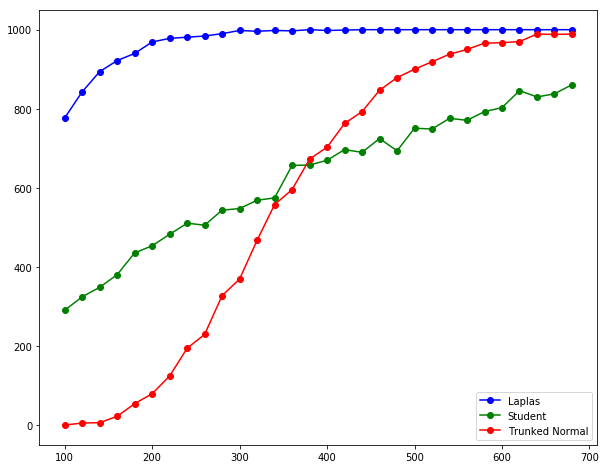

In [154]:
Show_Graphs('Харке')

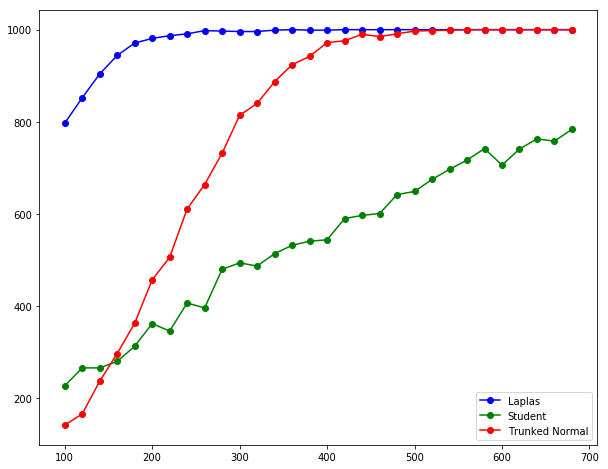

In [155]:
Show_Graphs('Шапиро')

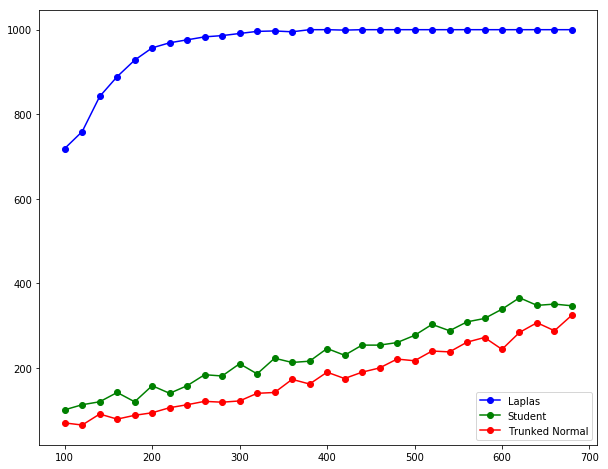

In [156]:
Show_Graphs('Лиллиефорс')

### Вывод (Мощности): 
Мощности критериев увеличиваются у увеличением длинны выборки. Среди критериев набольшую мощность
дает критерий Шапиро-Уилка, а наихудшую - критерий Лиллиефорса (на занятиях было упомянуто, что этот критерий имеет малую мощность и предтавляет лишь исторический интерес). Хуже всего отделяется Распределение стьюдента, а лучше всего распределение Лапласса.